In [1]:
import os

# Set the base directory (in case you want to
# keep a notebook in a subfolder)
subdir = '/examples'
basedir = os.environ['HOME'] + subdir

os.chdir(basedir)

In [2]:
# External package imports
import matplotlib
import matplotlib.pyplot as plt

# Local package imports
from libs.GcmData.GcmDataLoaderExocam import GcmDataLoaderExocam
import libs.utils

# Adjust font size of plots with this
# matplotlib.rcParams.update({ 'font.size': 16 })

## Data

In [3]:
loader = GcmDataLoaderExocam(
    id='thai-hab1',
    path='data/{id}.cam.h0.*.nc'
)

gcm_data = loader.load()

Centering longitude
Standardising vars


## Plotting

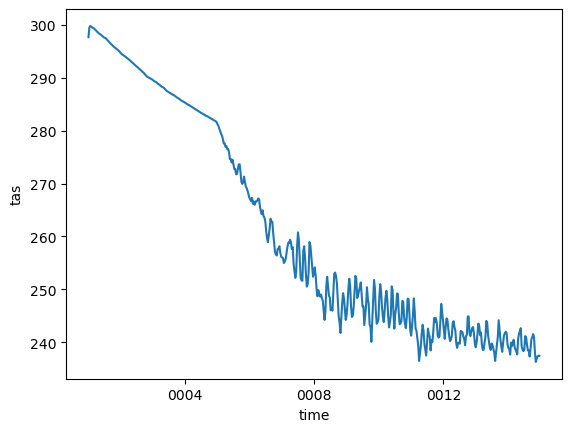

In [4]:
# Select a surface variable, e.g. surface temperature `tas`.
# Remembering that each grid cell is a different size,
# we need to take a weighted mean before we plot:
gcm_data.gcm_data\
    .weighted_lat()\
    .mean(('lat', 'lon'))\
    ['tas']\
    .plot()

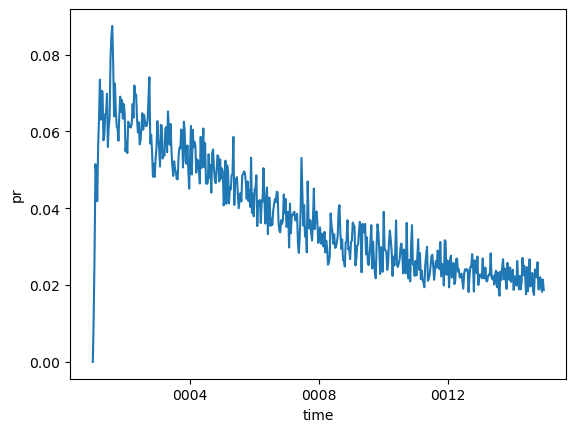

In [5]:
# Alternatively, we can find a global total value, such as
# precipitation `pr`
gcm_data.gcm_data\
    .weighted_lat()\
    .sum(('lat', 'lon'))\
    ['pr']\
    .plot()

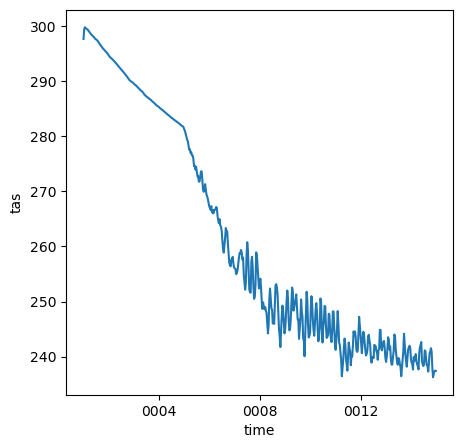

In [6]:
# We can also use the create_figure utility function
# to create our own figure and plot to that:

# Create matplotlib figure with axes
fig, axs = libs.utils.create_figure(
    shape=(1, 1), # Figure with 1x1 subfigures
    height=5,     # Subfigure has height of '5'
    width=5       # Subfigure has width of 5
)

gcm_time_series = gcm_data.gcm_data\
    .weighted_lat()\
    .mean(('lat', 'lon'))\
    ['tas']

gcm_time_series.plot(ax=axs[0])

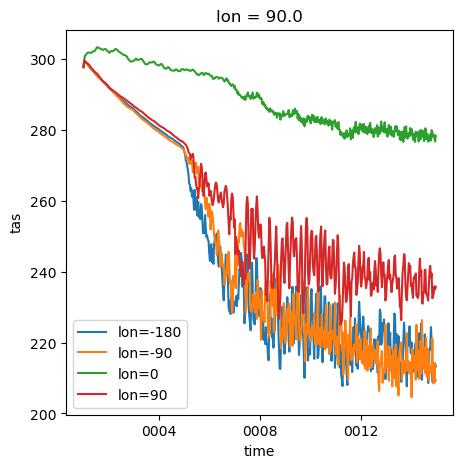

In [7]:
# Compare time series of different longitudes average over latitude

# Create matplotlib figure with axes
fig, axs = libs.utils.create_figure(
    shape=(1, 1), # Figure with 1x1 subfigures
    height=5,     # Subfigure has height of '5'
    width=5       # Subfigure has width of 5
)

confs_longitudes = [-180, -90, 0, 90]

# Loop over list of longitudes
for i, lon in enumerate(confs_longitudes):
    gcm_lon_time_series = gcm_data\
        .gcm_data.weighted_lat()\
        .mean('lat')\
        .sel(lon=lon)\
        ['tas']

    gcm_lon_time_series.plot(
        ax=axs[0],
        label=f'lon={lon}'
    )

# Show legend
axs[0].legend()